### 1. 다층 퍼셉트론(MultiLayer Perceptron, MPL)

* 다층 퍼셉트론은 피드 포워드 신경망(Forward Neural Network, FFNN)의 가장 기본적인 형태
* 피드 포워드 신경망은 입력층에서 출력층으로 오직 한 방향으로만 연산방향이 정해져 있는 신경망을 말함


### 2. Keras의 texts_to_matrix() 이해하기


In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
texts = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']

### 정수인코딩
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
print(tokenizer.word_index)

{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


* texts_to_matrix() : 입력 텍스트 데이터로부터 행렬을 만드는 도구. 'binary', 'count', 'freq', 'tfidf' 총 4개의 모드를 지원

In [3]:
### count 모드
print(tokenizer.texts_to_matrix(texts, mode='count'))

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


* Count 모드는 단어행렬(Document-Term Matrix, DTM)을 생성한 결과
* 주의할 점은 첫번째 열이 모든 행에 값이 0인 것이 추가된다는 것이어서, 열의 갯수가 10개가 됨

---
#### binary 모드

In [4]:
print(tokenizer.texts_to_matrix(texts, mode='binary'))

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


* Count 모드와 유사하나 2이상은 무시. 따라서 변별력 부족

#### tfidf 모드

In [5]:
print(tokenizer.texts_to_matrix(texts, mode='tfidf').round(2)) ## 둘째자리 반올림

[[0.   0.   0.85 0.85 1.1  0.   0.   0.   0.   0.  ]
 [0.   0.85 0.85 0.85 0.   0.   0.   0.   0.   0.  ]
 [0.   1.43 0.   0.   0.   1.1  1.1  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.1  1.1  1.1 ]]


* TF-IDF 행렬이나, 사이킷런의 TfidfVectorizer에서 만드는 방식과는 조금 다름
* 사이킷런에서는 단어의 빈도를 이용했다면, 여기에서는 각 문서에서의 각 단어 빈도에 자연로그를 씌우고 1을 더한 값으로 정의함. 그래도 기존의 의도는 그대로 반영됨

In [6]:
print(tokenizer.texts_to_matrix(texts, mode='freq').round(2))

[[0.   0.   0.33 0.33 0.33 0.   0.   0.   0.   0.  ]
 [0.   0.33 0.33 0.33 0.   0.   0.   0.   0.   0.  ]
 [0.   0.5  0.   0.   0.   0.25 0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.33 0.33 0.33]]


* 각문서에서 단어별 등장횟수를 분자로 하고, 각 문서의 크기(문서에 등장하는 단어 수)를 분모로 측정

### 3. 20개 뉴스그룹(Twenty Newsgroups) 데이터 

In [7]:
from sklearn.datasets import fetch_20newsgroups
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [8]:
newsdata = fetch_20newsgroups(subset='train')

In [9]:
print(newsdata.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [11]:
print(newsdata.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality

In [13]:
len(newsdata.data)  # 훈련데이터 갯수

11314

In [17]:
print(newsdata.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [16]:
print(newsdata.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


####  모델 목적 : 테스트 데이터에서 이메일 본문을 보고 20개 주제 중 어떤 주제인지를 맞추는 것 

In [19]:
print(newsdata.target_names[newsdata.target[0]])

rec.autos


In [20]:
#### 통계정보 알아보기

In [21]:
data = pd.DataFrame(newsdata.data, columns=['email'])
data['target'] = pd.Series(newsdata.target)
data.tail()

,email,target
11309,From: jim.zisfein@factory.com (Jim Zisfein) \n...,13
11310,From: ebodin@pearl.tufts.edu\nSubject: Screen ...,4
11311,From: westes@netcom.com (Will Estes)\nSubject:...,3
11312,From: steve@hcrlgw (Steven Collins)\nSubject: ...,1
11313,From: gunning@cco.caltech.edu (Kevin J. Gunnin...,8


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 132.7+ KB


In [23]:
data.describe()

,target
count,11314.000000
mean,9.293000
std,5.562719
min,0.000000
25%,5.000000
50%,9.000000
75%,14.000000
max,19.000000


In [24]:
data.target.value_counts()  # 가장 많은 것순으로 정렬

10    600
15    599
8     598
9     597
11    595
13    594
7     594
5     593
14    593
2     591
12    591
3     590
6     585
1     584
4     578
17    564
16    546
0     480
18    465
19    377
Name: target, dtype: int64

In [25]:
## Null 값 체크
data.isnull().sum()

email     0
target    0
dtype: int64

In [26]:
print('중복을 제외한 샘플의 수 : {}'.format(data['email'].nunique()))
print('중복을 제외한 주제의 수 : {}'.format(data['target'].nunique()))

중복을 제외한 샘플의 수 : 11314
중복을 제외한 주제의 수 : 20


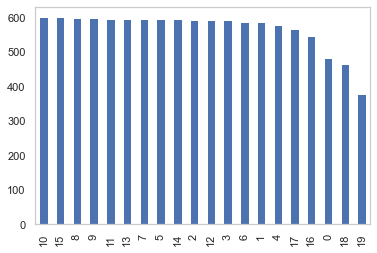

In [30]:
### 시각화
%matplotlib inline
data.target.value_counts().plot(kind='bar')
plt.grid(False);

* 10번 주제가 가장 많고, 19번주제가 가장 적음
* 대체로 400-600개 사이 분포를 가짐

In [31]:
print(data.groupby('target').size().reset_index(name='count'))  # 인덱스 순으로 정렬

    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


In [34]:
data.groupby('target').size().reset_index(name='count')

,target,count
0,0,480
1,1,584
2,2,591
3,3,590
4,4,578
5,5,593
6,6,585
7,7,594
8,8,598
9,9,597


In [35]:
#### test 데이터 불러오기
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True)
train_email = data['email']
train_label = data['target']
test_email = newsdata_test.data
test_label = newsdata_test.target

In [36]:
### 전처리 진행
vocab_size = 10000  # 사용할 최대 단어 갯수 정의
num_classes = 20  # 20개 주제

In [37]:
def prepare_data(train_data, test_data, mode):
    tokenizer = Tokenizer(num_words=vocab_size)  # vocab size 만큼의 단어만 사용
    tokenizer.fit_on_texts(train_data)
    X_train = tokenizer.texts_to_matrix(train_data, mode=mode)
    X_test = tokenizer.texts_to_matrix(test_data, mode=mode)
    
    return X_train, X_test, tokenizer.index_word

In [38]:
X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary')
y_train = to_categorical(train_label, num_classes)
y_test = to_categorical(test_label, num_classes)

In [39]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((11314, 10000), (11314, 20), (7532, 10000), (7532, 20))

In [40]:
### 빈도수 상위 1번 단어와 빈도수 9,999번 단어 확인
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[1]))
print('빈도수 상위 9999번 단어 : {}'.format(index_to_word[9999]))

빈도수 상위 1번 단어 : the
빈도수 상위 9999번 단어 : mic


In [41]:
len(index_to_word)

134142

In [42]:
### 4. 다층 퍼셉트론을 사용하여 텍스트 분류하기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [45]:
def fit_and_evaluate(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Dense(256, input_shape=(vocab_size,), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)
    
    score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
    return score[1]

* 은닉층 2개(256, 128 각각)를 넣었고, 과적합을 막기 위해 dropout 적용 

In [46]:
### 트레이닝
modes = ['binary', 'count', 'tfidf', 'freq']
for mode in modes:
    X_train, X_test, _ = prepare_data(train_email, test_email, mode)  # X 데이터 전처리
    score = fit_and_evaluate(X_train, y_train, X_test, y_test)
    print(mode + '모드의 테스트 정확도:', score)

Epoch 1/5
80/80 [==============================] - 3s 27ms/step - loss: 2.3029 - accuracy: 0.3307 - val_loss: 0.9974 - val_accuracy: 0.8189
Epoch 2/5
80/80 [==============================] - 2s 21ms/step - loss: 0.8924 - accuracy: 0.7512 - val_loss: 0.4678 - val_accuracy: 0.8799
Epoch 3/5
80/80 [==============================] - 2s 21ms/step - loss: 0.4478 - accuracy: 0.8836 - val_loss: 0.3461 - val_accuracy: 0.9037
Epoch 4/5
80/80 [==============================] - 2s 21ms/step - loss: 0.2630 - accuracy: 0.9361 - val_loss: 0.3000 - val_accuracy: 0.9099
Epoch 5/5
80/80 [==============================] - 2s 21ms/step - loss: 0.1797 - accuracy: 0.9551 - val_loss: 0.2880 - val_accuracy: 0.9117
binary모드의 테스트 정확도: 0.8349707722663879
Epoch 1/5
80/80 [==============================] - 3s 26ms/step - loss: 2.6625 - accuracy: 0.2585 - val_loss: 1.5138 - val_accuracy: 0.7420
Epoch 2/5
80/80 [==============================] - 2s 23ms/step - loss: 1.3966 - accuracy: 0.6399 - val_loss: 0.7173 - val